<a href="https://colab.research.google.com/github/angelaaliaga-rgb/Portafolio-/blob/Etapa2/Etapa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [ ]:
%pip install wbgapi

In [ ]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/my_func.py')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [ ]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [ ]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [ ]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


# ETAPA 1 - Análisis Descriptivo e Imputación de Datos

In [ ]:
# --- ETAPA 1: Revisión general del dataset ---

print("Filas (observaciones):", df_wb_raw.shape[0])
print("Columnas (variables):", df_wb_raw.shape[1])

print("\nN° países (códigos ISO) distintos:", df_wb_raw['country'].nunique())
if 'year' in df_wb_raw.columns:
    print("N° años distintos:", df_wb_raw['year'].nunique())
else:
    print("No hay columna 'year' en el DataFrame")


Filas (observaciones): 198
Columnas (variables): 67

N° países (códigos ISO) distintos: 198
No hay columna 'year' en el DataFrame


## Etapa 1: Análisis descriptivo e imputación de datos

El objetivo de esta etapa es comprender la estructura del dataset del Banco Mundial, evaluar la calidad de los datos disponibles y preparar la información para las etapas posteriores de reducción de dimensionalidad y modelación.

Se realiza una revisión general del conjunto de datos, identificando el número de países, variables y observaciones, así como la presencia de valores faltantes y outliers relevantes.


In [ ]:
# Número total de observaciones
df_wb_raw.shape[0]
#El código tiene un total de 198 observaciones, correspondiente a paises individuales.


198

In [ ]:
# Porcentaje de valores faltantes por variable
na_pct = df_wb_raw.isna().mean().sort_values(ascending=False) * 100

na_table = (
    na_pct
    .reset_index()
    .rename(columns={'index': 'Variable', 0: 'Porcentaje_NA'})
)

na_table.head(15)


,Variable,Porcentaje_NA
0,SE.PRM.NENR.FE,100.000000
1,SE.PRM.NENR.MA,100.000000
2,SE.PRM.NENR,100.000000
3,GC.TAX.EXPT.ZS,83.333333
4,GC.TAX.EXPT.CN,83.333333
5,GC.DOD.TOTL.CN,82.828283
6,GC.DOD.TOTL.GD.ZS,82.828283
7,IT.NET.USER.FE.ZS,71.212121
8,IT.NET.USER.MA.ZS,71.212121
9,EG.ELC.LOSS.ZS,64.646465


In [ ]:
# Regla del 15%
vars_eliminar = na_table.loc[na_table['Porcentaje_NA'] >= 15, 'Variable'].tolist()
vars_imputar = na_table.loc[
    (na_table['Porcentaje_NA'] > 0) & (na_table['Porcentaje_NA'] < 15),
    'Variable'
].tolist()

print("Variables a eliminar (>=15% NA):", len(vars_eliminar))
print("Variables a imputar (<15% NA):", len(vars_imputar))

Variables a eliminar (>=15% NA): 26
Variables a imputar (<15% NA): 24


Siguiendo la recomendación metodológica, se eliminan aquellas variables con más de un 15% de datos faltantes, mientras que las variables con menos de un 15% de valores perdidos serán imputadas.

### Revisión de datos faltantes

Se calcula el porcentaje de valores faltantes por variable con el fin de evaluar la calidad de la información disponible.
Siguiendo el criterio indicado en las instrucciones, se imputan aquellas variables con menos de un 15% de valores faltantes y se eliminan las variables que superan dicho umbral, con el objetivo de evitar sesgos y pérdida de información relevante.


In [ ]:
#Eliminar variables con demasiados NA
df_etapa1 = df_wb_raw.drop(columns=vars_eliminar).copy()

df_etapa1.shape


(198, 41)

### Imputación de valores faltantes

Para las variables seleccionadas, se utiliza la mediana como método de imputación, ya que es una medida robusta frente a valores extremos y permite conservar la distribución original de los datos.


In [ ]:
#Imputación de variables numéricas (<15%)
#Solo numéricas, usando mediana (robusto a outliers)

# Seleccionar columnas numéricas
num_cols = df_etapa1.select_dtypes(include=['float64', 'int64']).columns

# Imputación por mediana
for col in vars_imputar:
    if col in num_cols:
        df_etapa1[col] = df_etapa1[col].fillna(df_etapa1[col].median())

# Verificación
df_etapa1.isna().sum().sum()

np.int64(0)

### Estadísticas descriptivas

Se calculan estadísticas descriptivas básicas (media, mediana, desviación estándar, valores mínimos y máximos) con el objetivo de caracterizar el comportamiento general de las variables y detectar posibles patrones relevantes.


In [ ]:
#Estadisticas descriptivas
desc = df_etapa1[num_cols].describe().T
desc['median'] = df_etapa1[num_cols].median()

desc[['mean', 'median', 'std', 'min', 'max']].round(2)

,mean,median,std,min,max
SP.POP.GROW,1.150000e+00,1.110000e+00,1.580000e+00,-8.420000e+00,6.530000e+00
SP.POP.TOTL,3.999611e+07,7.335048e+06,1.484957e+08,9.816000e+03,1.438070e+09
SP.POP.TOTL.FE.IN,1.987776e+07,3.672054e+06,7.252840e+07,4.795000e+03,6.961863e+08
SP.POP.TOTL.FE.ZS,4.997000e+01,5.033000e+01,2.990000e+00,2.848000e+01,5.492000e+01
SP.POP.TOTL.MA.IN,2.011836e+07,3.560820e+06,7.598056e+07,5.021000e+03,7.418833e+08
SP.POP.TOTL.MA.ZS,5.003000e+01,4.967000e+01,2.990000e+00,4.508000e+01,7.152000e+01
SP.URB.GROW,1.730000e+00,1.520000e+00,1.830000e+00,-8.350000e+00,8.110000e+00
SP.URB.TOTL,2.289674e+07,4.463172e+06,8.019058e+07,6.283000e+03,9.244403e+08
SP.URB.TOTL.IN.ZS,6.221000e+01,6.362000e+01,2.272000e+01,1.506000e+01,1.000000e+02
SL.TLF.TOTL.FE.ZS,4.230000e+01,4.508000e+01,8.490000e+00,6.850000e+00,5.467000e+01


### Análisis de la variable objetivo: PIB

La variable objetivo del proyecto es el Producto Interno Bruto medido en paridad de poder adquisitivo (PPP).
Se analiza su distribución mediante gráficos y se identifican posibles asimetrías y valores extremos.
Posteriormente, el PIB es discretizado en cinco categorías ordinales, lo que permitirá abordar el problema como una tarea de clasificación en las etapas siguientes.


In [ ]:
#Distribución del PIB (OBLIGATORIO)
# Recuperar PIB numérico desde WB (solo ese indicador)
pib_num = wb.data.DataFrame(
    ['NY.GDP.MKTP.PP.KD'],
    economy=df_etapa1['country'].unique().tolist(),
    time=2021
).reset_index()

pib_num = pib_num.rename(columns={'NY.GDP.MKTP.PP.KD': 'PIB_num'})

# Merge con dataset principal
df_etapa1 = df_etapa1.merge(
    pib_num[['economy', 'PIB_num']],
    left_on='country',
    right_on='economy',
    how='left'
)

df_etapa1[['country', 'PIB_num']].head()


,country,PIB_num
0,ZWE,7.625453e+10
1,ZMB,6.867212e+10
2,PSE,2.787813e+10
3,VNM,1.192059e+12
4,VUT,9.591521e+08


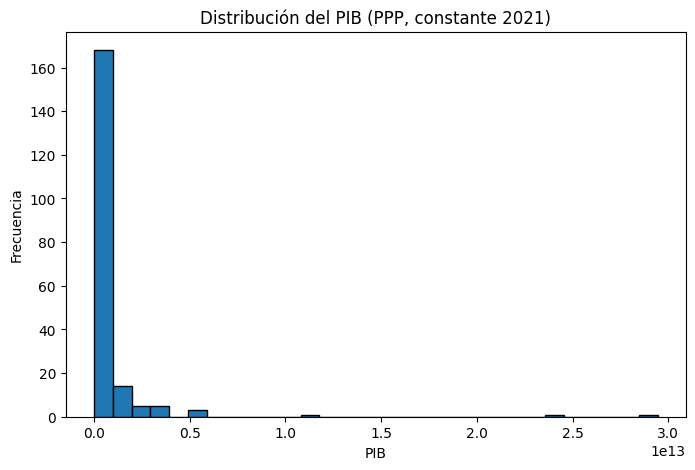

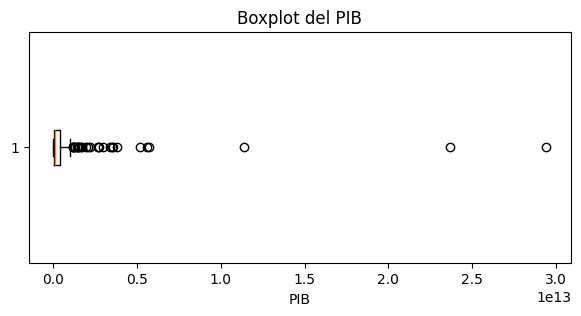

In [ ]:
#Histograma y boxplot del PIB
import matplotlib.pyplot as plt

# Histograma
plt.figure(figsize=(8,5))
plt.hist(df_etapa1['PIB_num'].dropna(), bins=30, edgecolor='black')
plt.title('Distribución del PIB (PPP, constante 2021)')
plt.xlabel('PIB')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(7,3))
plt.boxplot(df_etapa1['PIB_num'].dropna(), vert=False)
plt.title('Boxplot del PIB')
plt.xlabel('PIB')
plt.show()


### Distribución geográfica del PIB

Se construye un mapa mundial del PIB con el objetivo de visualizar las diferencias espaciales entre países y reforzar la interpretación económica de los resultados obtenidos.
